In [1]:
#Setup in colab
!pip install cellpylib
!pip install pandas
!pip install scipy

  Preparing metadata (setup.py) ... done
  Created wheel for cellpylib: filename=cellpylib-2.4.0-py3-none-any.whl size=37921 sha256=a9f3886bde685887b451b092a65d407d288b8558a6a668f5dadefbf7b8a954e3
  Stored in directory: /root/.cache/pip/wheels/44/bc/c4/4730d328071b164c25d392c2d932b513e56ff0857da63d17e7
Successfully built cellpylib


In [2]:
import cellpylib as cpl
import pandas as pd
import numpy as np
from random import random
from matplotlib import pyplot as plt
from scipy import stats

- Tutorial from: https://cellpylib.org/working.html

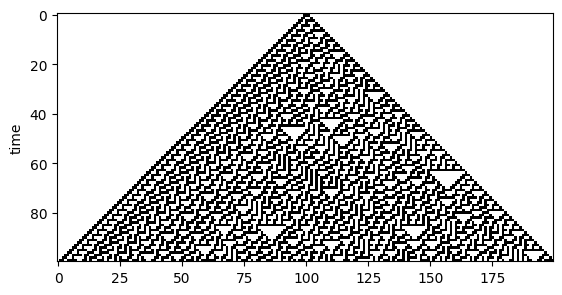

In [3]:
cellular_automaton = cpl.init_simple(200)
cellular_automaton = cpl.evolve(cellular_automaton, timesteps=100, memoize=True,
                                apply_rule=lambda n, c, t: cpl.nks_rule(n, 30))
cpl.plot(cellular_automaton)

- Attempting to implement the discussed logic for CA-based dimensionality reduction

Cell state evolution accross iterations


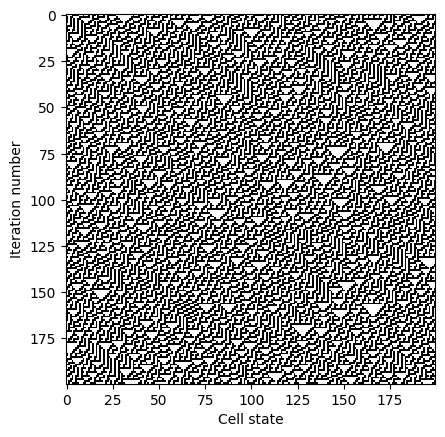

Data before dimensionality reduction


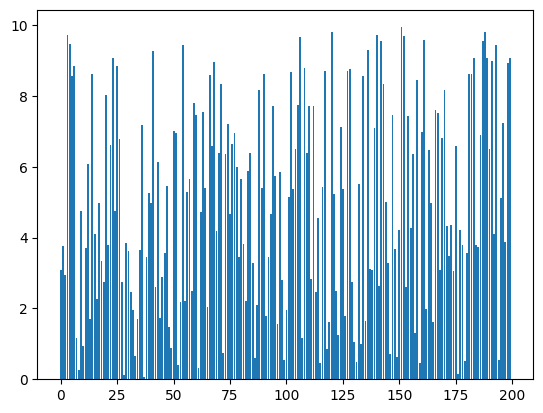

Initial number of dimensions: 200
Mean: 4.9919797959962855
Median: 4.972453222207795
Mode: 0.07810506109145354
SD: 2.882137763564398

Data after dimensionality reduction


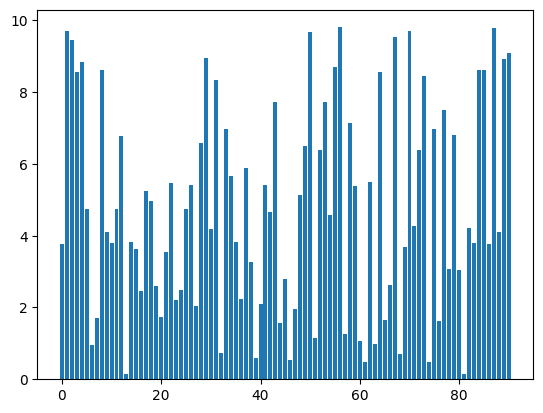

Rule number: 30
Total iterations: 200
Cell state index: -1
Number of dimensions preserved: 91
Mean: 4.812107158988748
Median: 4.565390484823979
Mode: 0.13320975413354086
SD: 2.8905035225816316


In [5]:
#Hyperparameters for demo
initial_dimensions = 200
num_iterations = 200
th_value = 4
rule_num = 30

#simulated random data
data = np.array([random()*10 for _ in range(initial_dimensions)])

#rule for converting input values to 1/0 based on thresholds
thresholds = lambda x: 0 if x < th_value else 1

#initalizing cellular automaton (see the tutorial)
ca_input = np.array([list(map(thresholds, data))])

#evolving the automaton
cellular_automaton = cpl.evolve(ca_input, timesteps=num_iterations, memoize=True,
                                apply_rule=lambda n, c, t: cpl.nks_rule(n, rule_num))

#plotting the state of cells at different stages of evolution
print('Cell state evolution accross iterations')
cpl.plot(cellular_automaton, xlabel='Cell state', ylabel='Iteration number')

#plotting the initial data across cells + summary statistics
print('Data before dimensionality reduction')
plt.bar(height=data, x=range(initial_dimensions))
plt.show()
print(f'Initial number of dimensions: {data.shape[0]}')
print(f'Mean: {np.mean(data)}')
print(f'Median: {np.median(data)}')
print(f'Mode: {stats.mode(data).mode}')
print(f'SD: {np.std(data)}')

#helper function
def plot_data_evolution(cellular_automaton, data, iteration_index, rule_num, calculate_only=False, calculate=False):
    '''Extracting and plotting the data in reduced dimensions using state of cells from given iteration_index.'''
    #extracting cell state after last iteration of evolution
    mask = cellular_automaton[iteration_index,:]

    #keeping based on the cell state after i of evolution
    dim_red_data = data[mask.astype(bool)]

    #calculating new number of dimensions
    new_size = len(dim_red_data)
    if calculate_only:
        return new_size

    #plotting the data after dim.reduction
    print('\nData after dimensionality reduction')
    plt.bar(height=dim_red_data, x=range(new_size))
    plt.show()
    print(f'Rule number: {rule_num}')
    print(f'Total iterations: {cellular_automaton.shape[1]}')
    print(f'Cell state index: {iteration_index}')
    print(f'Number of dimensions preserved: {dim_red_data.shape[0]}')
    print(f'Mean: {np.mean(dim_red_data)}')
    print(f'Median: {np.median(dim_red_data)}')
    print(f'Mode: {stats.mode(dim_red_data).mode}')
    print(f'SD: {np.std(dim_red_data)}')
    if calculate:
        return new_size

plot_data_evolution(cellular_automaton, data, rule_num=rule_num, iteration_index=-1)